## Slope reinforcement indicator

### Life cycle of Machine learning Project 

<ul>
  <li>Understanding the problem statement</li>
  <li>Data collection</li>
  <li>Data checks to perform</li>
  <li>Exploratory data analysis</li>
  <li>Data Pre-processing</li>
  <li>Model trainning</li>
  <li>Choose the best model</li>
</ul>

## 1) Problem Statement


The slope stability problem is usually solved using a software, which can be finite element software or limit equilibrium software.
To design a support system, an engineer have to iterate over different desings proposed by him, this task take a lot of time since just experienced engineers know where to start.

$\bullet$  For this reason a <b>Slope reinforcement indicator</b> is formulated, to standarize and optimize the process of support selection and avoid estimates.

## 2) Data collection


<ul>
  <li>The data source is provided in 25 different csv files where every csv file is associated with a combination of initial input variables in <b>Main_config.xlsx</b> file. Every csv file contains information about different soil conditions, soil resistance properties, and the associated resistance factor (Factor of safety).</li>
  <li>The dataset consist of 25 different geometrical conditions associated with 5000 simulations results each.</li>
</ul>

### 2.1) Import data and required packages


Importing Pandas, Seaborn, Matplotlib and Numpy

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


Read csv files and add Main_config data, then append every csv into one file.

In [2]:
data_excel = pd.read_excel("Main_config.xlsx")

for i in range(1,26):
    data_df = pd.read_csv("data" + str(i) + ".csv")

    phi    = data_excel["Slope Angle"][i-1]*np.ones(5000)
    height = data_excel["H"][i-1]*np.ones(5000)

    add_data    = pd.DataFrame({ "slope_angle": phi, "slope_height" :height})
    add_data    = pd.concat([data_df , add_data] , axis=1)
    add_data.to_csv("add_data" + str(i) + ".csv")


df_main = pd.read_csv("add_data1.csv")

for i in range(2,26):
    df_main = pd.concat( [df_main , pd.read_csv("add_data" + str(i) + ".csv")] )

df_main = df_main.fillna(0)    

df_main.drop(["Unnamed: 7", "Unnamed: 0"], axis=1, inplace=True)


Print first 5 elements in new data

In [38]:
df_main.head()

,Material 1 : Cohesion (kN/m2),Material 1 : Phi (deg),Material 1 : Unit Weight (kN/m3),Load #1 Magnitude (kN/m),Load #2 Magnitude (kN/m),Factor of Safety - spencer,Factor of Safety - gle/morgenstern-price,slope_angle,slope_height
0,9.25214,27.0344,16.2721,25.7109,0.651980,2.35577,2.35758,30.0,3.0
1,12.84510,13.9206,16.3404,17.2906,0.615234,2.04328,2.04351,30.0,3.0
2,10.36260,30.1019,15.2261,89.1311,0.439082,1.79361,1.79468,30.0,3.0
3,8.00854,27.3663,14.5454,81.8012,0.598084,1.58966,1.59232,30.0,3.0
4,12.31330,40.8389,19.4886,75.3521,0.664819,2.75823,2.76120,30.0,3.0


Save new data to a csv file

In [ ]:
# df_main.to_csv("main_data.csv", header=True)

We now work with a new data set <b>main_data.csv</b>

In [39]:
df_main = pd.read_csv("main_data.csv")
df_main.head()


,Cohesion,Phi,Unit_weight,Pe,Ps,FSs,FSgmp,slope_angle,slope_height
0,9.25214,27.0344,16.2721,25.7109,65.1980,1.97695,2.01425,60.0,15.0
1,12.84510,13.9206,16.3404,17.2906,61.5234,1.22958,1.25297,60.0,15.0
2,10.36260,30.1019,15.2261,89.1311,43.9082,1.55863,1.56072,60.0,15.0
3,8.00854,27.3663,14.5454,81.8012,59.8084,1.62134,1.62115,60.0,15.0
4,12.31330,40.8389,19.4886,75.3521,66.4819,2.57291,2.57134,60.0,15.0


### 2.2) Dataset information


<ul>
  <li>Cohesion: the cohesion of soils, a resistance parameter from mohr coulomb criterion</li>
  <li>Phi (&phi;): friction angle of soils</li>
  <li>Unit Weight (&gamma;): unit weight of soils</li>
  <li>Pe (External load): Load present in the crown of the slope</li>
  <li>Ps (Support Pressure): Load that represents the support system</li>
  <li>FS s: factor of safety obtained with the Spencer method</li>
  <li>FS gmp: factor of safety obtained with the GM-P method</li>
  <li>Slope angle (&alpha;): angle of the base of the slope</li>
  <li>Slope height (H): Height of the slope</li>
</ul>

### 2.3) Data checks to perform

<ul>
  <li>Check missing values</li>
  <li>Check duplicates</li>
  <li>Check data types</li>
  <li>Check the number of uniques values in each column</li>
  <li>Check statistics of the data set</li>
</ul>

#### 2.31) Check missing values


In [40]:
df_main.isna().sum()

Cohesion        0
Phi             0
Unit_weight     0
Pe              0
Ps              0
FSs             0
FSgmp           0
slope_angle     0
slope_height    0
dtype: int64

There are no missing values

#### 2.32) Check Duplicates

In [41]:
df_main.duplicated().sum()

0

No duplicated values are found

#### 2.33) Check data types

In [53]:
df_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cohesion      55000 non-null  float64
 1   Phi           55000 non-null  float64
 2   Unit_weight   55000 non-null  float64
 3   Pe            55000 non-null  float64
 4   Ps            55000 non-null  float64
 5   FSs           55000 non-null  float64
 6   FSgmp         55000 non-null  float64
 7   slope_angle   55000 non-null  float64
 8   slope_height  55000 non-null  float64
dtypes: float64(9)
memory usage: 3.8 MB


[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')]

### 2.4) Exploring Data

First we explore the data using a heatmap, as every variable is float64

<Axes: >

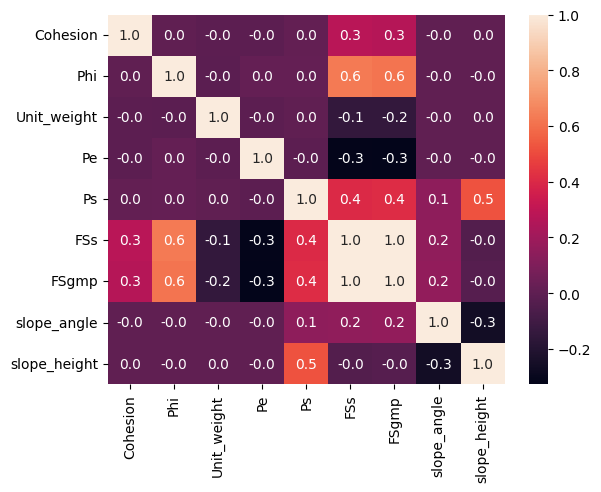

In [43]:
sns.heatmap(df_main.iloc[:,0:].corr(), annot=True ,fmt=".1f")

From the heatmap it is observed that the major effects are presented by Phi (deg), slope_height and slope_angle with a correlation of 0.7, 0.5, 0.4, respectively.

Separate the data between input <b>x_data_1</b> and output <b>y_data_1</b>

In [5]:
x_data_1    = df_main.iloc[:,[0,1,2,3,4,7,8]]
y_data_1    = df_main.iloc[:,[5,6]]

#### Feature engineering using <b>ANOVA</b>

In [68]:
import sklearn.feature_selection

f_test  = sklearn.feature_selection.f_classif(x_data_1, y_data_1.iloc[:,0])
f_test  = pd.DataFrame({"F0_value" : f_test[0]})


Reset indexes to get sorted positions

In [69]:
f_test.reset_index(inplace=True)
f_test.sort_values(by="F0_value", inplace=True)
f_test.reset_index(inplace=True)

names  = [r"$c$",r"$\phi$",r"$\gamma$",r"$P_{E}$",r"$P_{s}$",r"$\alpha$",r"$H$"]
nnames = pd.DataFrame(list(zip(names, f_test["index"])), columns= ["name", "index"]).sort_values(by="index")


   level_0  index  F0_value
0        5      5  1.002648
1        6      6  1.019524
2        2      2  1.035108
3        0      0  1.093781
4        3      3  1.101090
5        4      4  1.145125
6        1      1  1.852243


Bar plot of variable importance

C:\Users\fbrow\AppData\Local\Temp\ipykernel_13516\3581821997.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(nnames["name"]))


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '$P_{E}$'),
  Text(1, 0, '$H$'),
  Text(2, 0, '$\\gamma$'),
  Text(3, 0, '$P_{s}$'),
  Text(4, 0, '$\\alpha$'),
  Text(5, 0, '$c$'),
  Text(6, 0, '$\\phi$')])

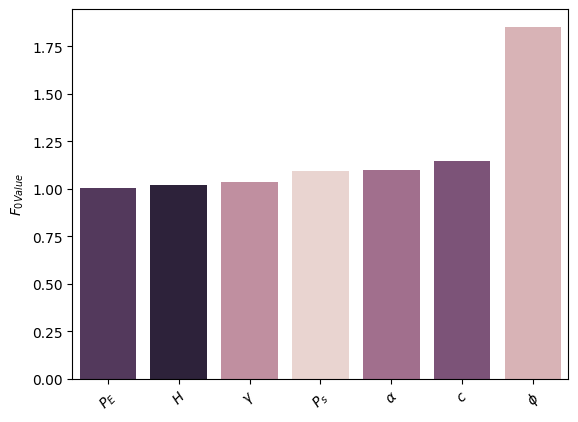

In [70]:
ax = sns.barplot(x = f_test.index.values ,
                 y = f_test["F0_value"],
                 hue= f_test["index"],
                 legend= False)
ax.set(ylabel = r"$F_{0 Value}$")
ax.set_xticklabels(list(nnames["name"]))
plt.xticks(rotation = 45)

From the graph it is observed that $\phi$ is the most influential input variable follower by $c$ and $\alpha$.

We proceed to visualize the effects of different variables with $\phi$.

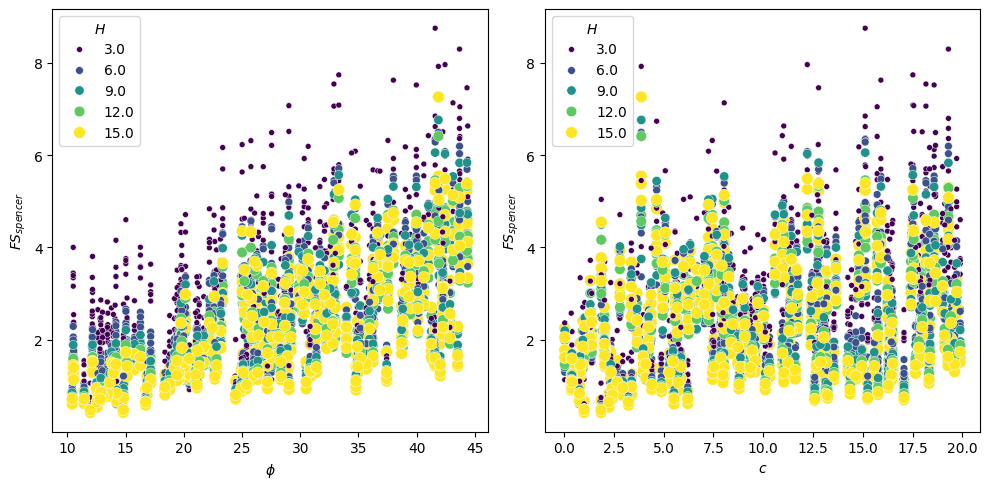

In [72]:
fig,axs = plt.subplots(1,2, figsize=(10,5))

df_main_n = df_main[df_main.iloc[:,3] < 3]


names   = ["Material 1 : Phi (deg)","Material 1 : Cohesion (kN/m2)"]
names_i = [r"$\phi$", r"$c$"]

for i in range(0,2):
    ax = sns.scatterplot(x = df_main_n[names[i]] ,
                        y = df_main_n["Factor of Safety - spencer"],
                        hue= df_main_n["slope_height"],
                        size= df_main_n["slope_height"],
                        palette="viridis",
                        legend= True,
                        ax = axs[i])

    ax.set(xlabel = names_i[i])
    ax.set(ylabel = r"$FS_{spencer}$")
    ax.legend(title = r"$H$")



fig.tight_layout()
plt.show()

It is observable that as the slope height $H$ reduces the $FS$ increases.

Now we proceed to visualize the effect of the support pressure $P_{s}$

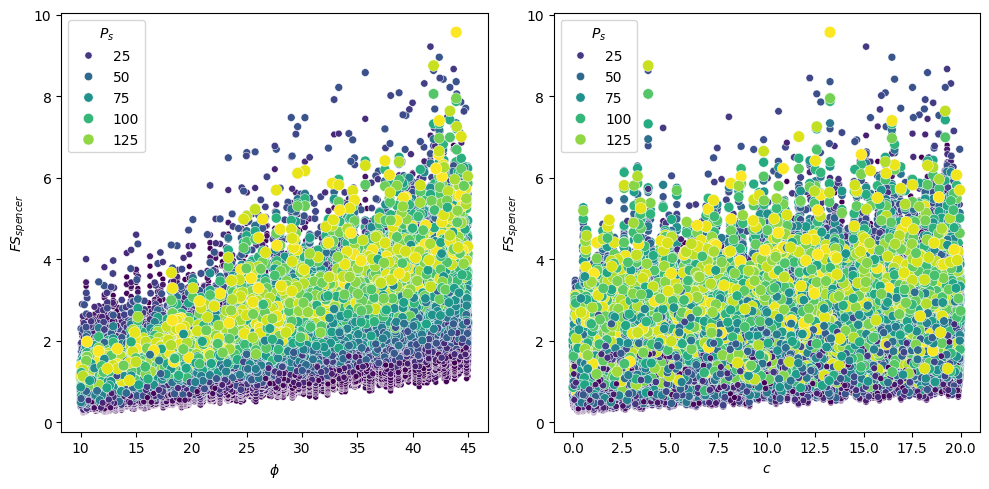

In [73]:
fig,axs = plt.subplots(1,2, figsize=(10,5))

names   = ["Material 1 : Phi (deg)","Material 1 : Cohesion (kN/m2)"]
names_i = [r"$\phi$", r"$c$"]
for i in range(0,2):
    ax = sns.scatterplot(x = df_main[names[i]] ,
                        y = df_main["Factor of Safety - gle/morgenstern-price"],
                        hue= df_main["Load #2 Magnitude (kN/m)"],
                        size= df_main["Load #2 Magnitude (kN/m)"],
                        palette="viridis",
                        legend= True,
                        ax = axs[i])

    ax.set(xlabel = names_i[i])
    ax.set(ylabel = r"$FS_{spencer}$")
    ax.legend(title = r"$P_{s}$")

fig.tight_layout()

From the Figure it can be observed that the support pressure $P_{s}$ increases the $FS$

Now we visualize the effect of slope angle, by visualizing the histograms

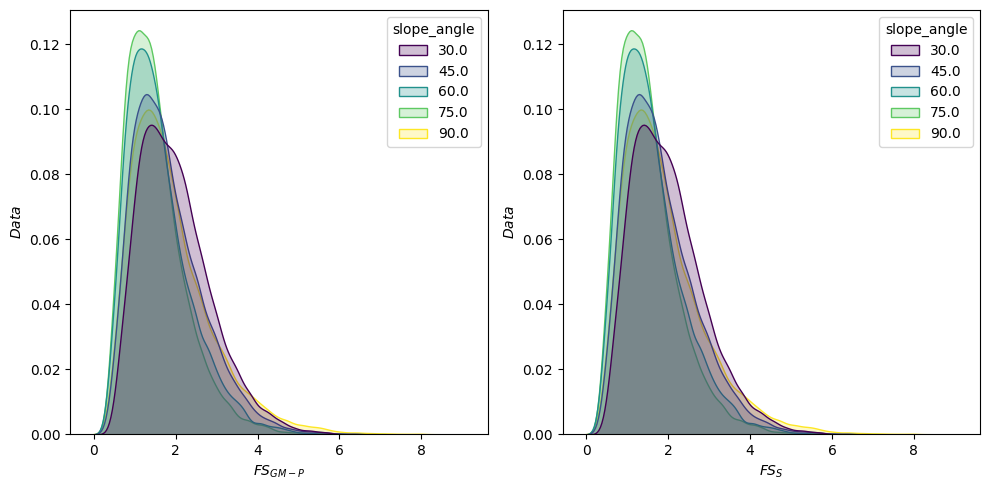

In [74]:
fig,axs = plt.subplots(1,2, figsize=(10,5))


names   = ["Factor of Safety - gle/morgenstern-price","Factor of Safety - spencer"]
names_i = [r"$FS_{GM-P}$", r"$FS_{S}$"]
for i in range(0,2):
    ax = sns.kdeplot( x = y_data_1["Factor of Safety - spencer"],
                      hue  = x_data_1["slope_angle"],
                      fill = True,
                      palette="viridis",
                      ax = axs[i])

    ax.set(xlabel = names_i[i])
    ax.set(ylabel = r"$Data$")

fig.tight_layout()

From the Figure it can be observed that the increase in slope angle $\alpha$ tends to decrease de median $FS$